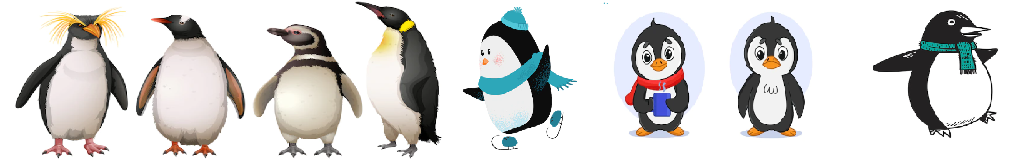

## Required Setup Step 0 - Import all necessary Libraries


In [1]:
# Import Libraries for Spreadsheet Automation 
import pandas as pd
import datetime as dt
from datetime import date
import os, glob, time
import rpa_excel as re
import file_manager as fm 
import snowflake.connector
from platform import python_version
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
df_penguins = sns.load_dataset("penguins")

In [3]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
sns.set_style('darkgrid')

In [5]:
df_penguins.shape 

(344, 7)

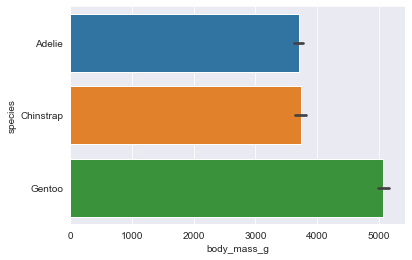

In [6]:
sns.barplot(x='body_mass_g', y='species',  data = df_penguins);

In [7]:
def get_dataframe_from_SQL(SQL): 
    # Change the follwoing to YOUR credentials 
    ctx = snowflake.connector.connect(
        user='JOE EBERLE',
        password='Jae$2052sf',
        account='cerner-healtheedw_wny')

    cur = ctx.cursor()  # Create a cursor object.
    cur.execute(SQL) # Esecute the passed in SQL 

    # Fetch the result set from the cursor and deliver it as the Pandas DataFrame.
    df = cur.fetch_pandas_all()
    cur.close()
    ctx.close()
    return df 


debugging_and_testing = False
if debugging_and_testing:
    sql = "select * from ds_patient_demo "
    df_PH_D_PERSONNEL_GROUP = get_dataframe_from_SQL(sql)
    df_PH_D_PERSONNEL_GROUP.head(2) 
    log_print(f'Step 1- {df_PH_D_PERSONNEL_GROUP.shape[0]} personell groups with {df_PH_D_PERSONNEL_GROUP.shape[1]} data columns')

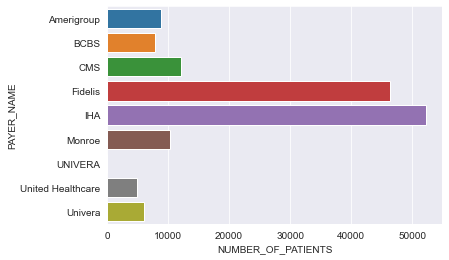

In [8]:
gsql = " " 
gsql = gsql + "with eligible_lives as " 
gsql = gsql + "("
gsql = gsql + "select  pbc.payer_name, pbc.plan_name , pbc.Member_id as Member_ID , pbc.EMPI_ID  as Patient_ID " 
gsql = gsql + "from WNY_DB.WNY.PH_F_Person_Benefit_Coverage  pbc " 
gsql = gsql + "where "
gsql = gsql + "pbc.population_id = 'a69329ea-d5a0-439c-8ef8-aa8b2f816206' "
gsql = gsql + "AND pbc.source_type = 'ENROLLMENT' "
gsql = gsql + "AND pbc.begin_dt_tm <= CURRENT_DATE "
gsql = gsql + "AND (pbc.end_dt_tm >= CURRENT_DATE OR pbc.end_dt_tm IS NULL) "
gsql = gsql + ") "
gsql = gsql + "select el.payer_name, count(distinct el.patient_id) as Number_of_Patients "
gsql = gsql + "from eligible_lives el "
gsql = gsql + "GROUP BY  el.payer_name "
gsql = gsql + "ORDER BY  el.payer_name "

df_eligible_lives_payer = get_dataframe_from_SQL(gsql)
df_eligible_lives_payer.head(50) 
sns.barplot(x='NUMBER_OF_PATIENTS',
            y='PAYER_NAME'
            , ci=None,  
            data = df_eligible_lives_payer);

In [9]:
import ydata_profiling # provides descriptive statistics in html for any dataframe
import pandas as pd 
import display_descriptive as dd

dd.display_descriptive_statistics(dd.get_descriptive_statistics(df_eligible_lives_payer,'Elligible_Lives'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Outputting descriptive statistics profile to: C:\infrastructure\html\Elligible_Lives_descriptive_statistics_profile.html


'Displaying C:\\infrastructure\\html\\Elligible_Lives_descriptive_statistics_profile.html in web brower'

## Step 0 - Optional Steps below to document and store Log files

In [10]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

NameError: name 'ql' is not defined